In [ ]:
import keras as K
from keras.datasets import fashion_mnist
import numpy as np
import tensorflow as tf

In [ ]:
num_features = 784
batch_size = 128
class_names = ['Футболка/топ', 'Штани', 'Светр', 'Сукня', 'Пальто',
               'Сандалі', 'Сорочка', 'Кросівки', 'Сумка', 'Черевики']

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train, X_test = np.array(X_train, np.float32), np.array(X_test, np.float32)

X_train, X_test = X_train / 255., X_test / 255.

In [ ]:
y_test.shape

(10000,)

In [ ]:
model = K.Sequential([
    K.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Dropout(0.25),
    K.layers.Conv2D(64, (3, 3), activation='relu'),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Conv2D(64, (3, 3), activation='relu'),
    K.layers.Flatten(),
    K.layers.Dense(128, activation='relu'),
    K.layers.Dropout(0.25),
    K.layers.Dense(10)
])

In [ ]:
model.compile(
    loss=K.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=K.optimizers.Adam(0.001),
    metrics=[K.metrics.SparseCategoricalAccuracy()]
)

In [ ]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_37 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_26 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_38 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_39 (Conv2D)          (None, 3, 3, 64)        

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=batch_size)

Epoch 1/10
469/469 [==============================] - 63s 130ms/step - loss: 0.6407 - sparse_categorical_accuracy: 0.7655 - val_loss: 0.4162 - val_sparse_categorical_accuracy: 0.8496
Epoch 2/10
469/469 [==============================] - 48s 103ms/step - loss: 0.3852 - sparse_categorical_accuracy: 0.8610 - val_loss: 0.3346 - val_sparse_categorical_accuracy: 0.8804
Epoch 3/10
469/469 [==============================] - 50s 108ms/step - loss: 0.3304 - sparse_categorical_accuracy: 0.8791 - val_loss: 0.3104 - val_sparse_categorical_accuracy: 0.8883
Epoch 4/10
469/469 [==============================] - 48s 103ms/step - loss: 0.3038 - sparse_categorical_accuracy: 0.8897 - val_loss: 0.2929 - val_sparse_categorical_accuracy: 0.8959
Epoch 5/10
469/469 [==============================] - 48s 102ms/step - loss: 0.2829 - sparse_categorical_accuracy: 0.8969 - val_loss: 0.2695 - val_sparse_categorical_accuracy: 0.9054
Epoch 6/10
469/469 [==============================] - 50s 106ms/step - loss: 0.2627 -

In [ ]:
import matplotlib.pyplot as plt

def plot_history(hst):
    plt.figure(figsize=(13, 4))

    plt.subplot(1, 2, 1)
    plt.plot(hst.history['loss'], label='train')
    plt.plot(hst.history['val_loss'], label='test')
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    plt.plot([round(100*e, 2) for e in hst.history['sparse_categorical_accuracy']], label='train')
    plt.plot([round(100*e, 2) for e in hst.history['val_sparse_categorical_accuracy']], label='test')
    plt.title('Accuracy')

    plt.ylim(0, 100)
    plt.legend()
    plt.tight_layout()
    plt.show()


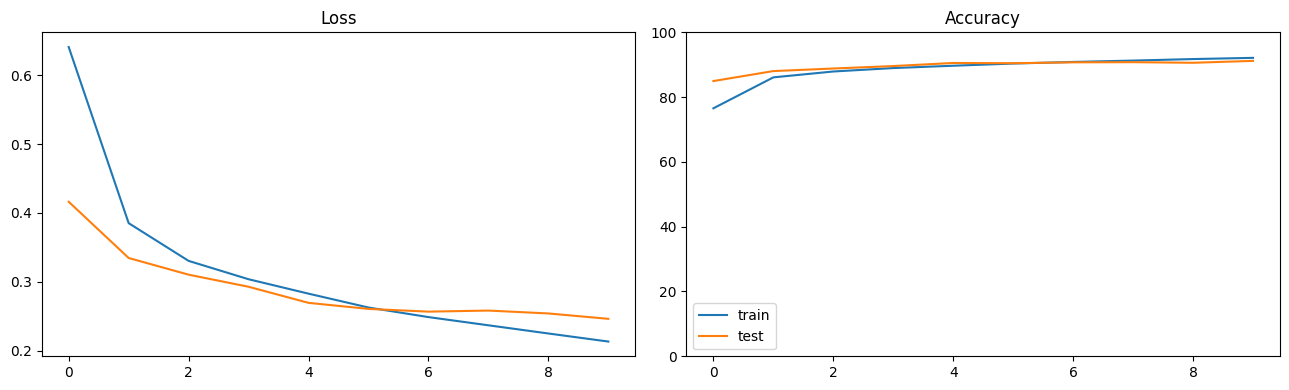

In [ ]:
plot_history(history)

1/1 [==============================] - 0s 89ms/step


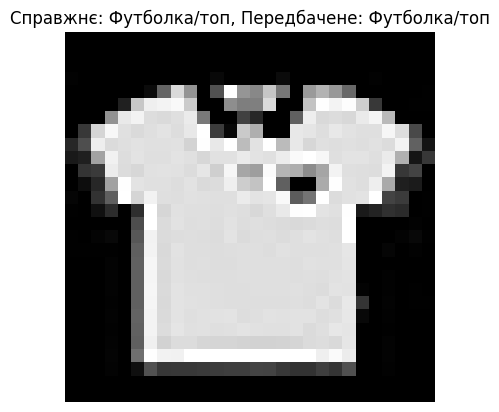

1/1 [==============================] - 0s 21ms/step


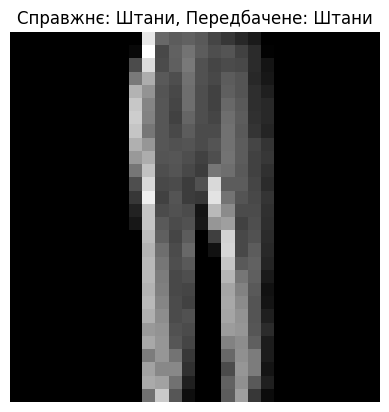

1/1 [==============================] - 0s 22ms/step


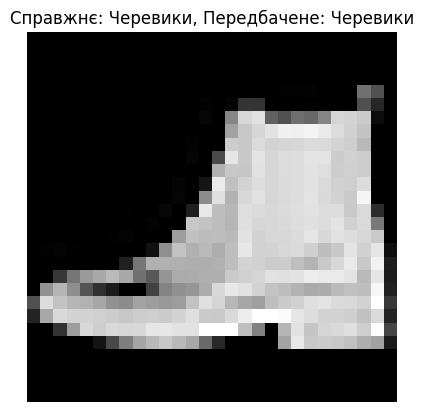

1/1 [==============================] - 0s 20ms/step


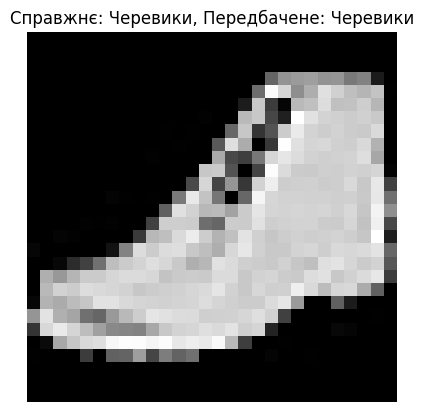

1/1 [==============================] - 0s 19ms/step


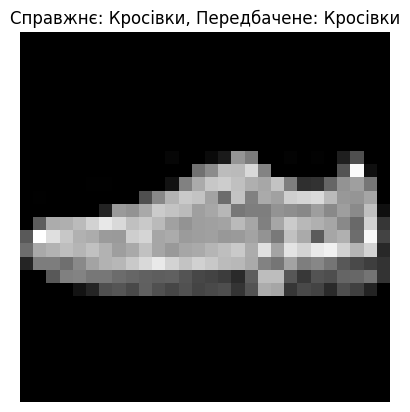

1/1 [==============================] - 0s 24ms/step


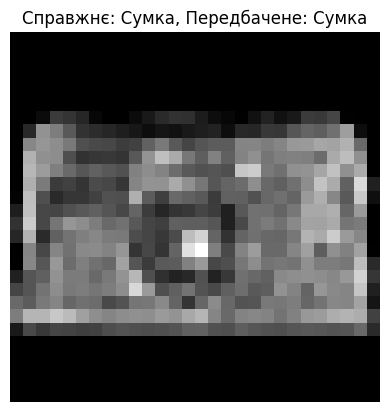

1/1 [==============================] - 0s 20ms/step


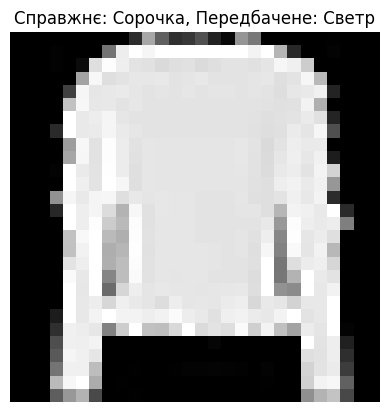

1/1 [==============================] - 0s 25ms/step


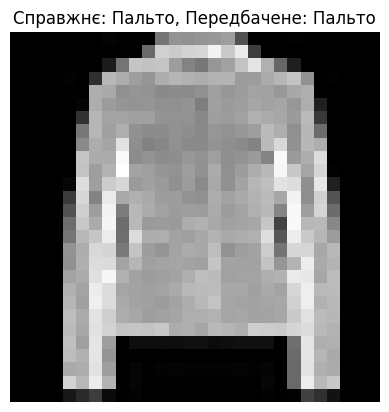

1/1 [==============================] - 0s 23ms/step


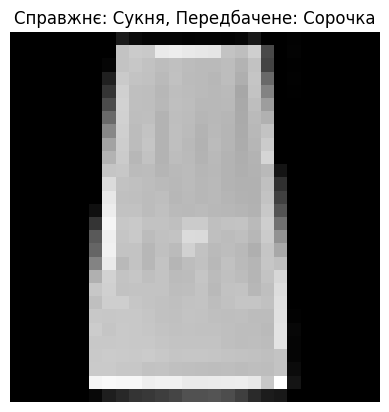

1/1 [==============================] - 0s 22ms/step


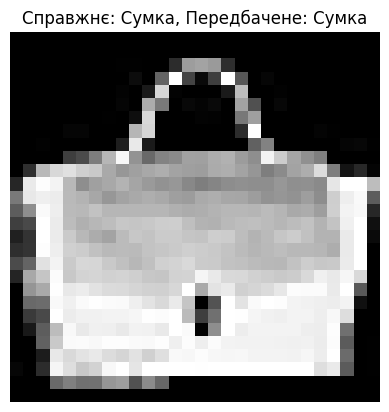

In [ ]:
import random

for i in range(10):
    image_idx = random.randint(0, len(X_test))
    image = X_test[image_idx]
    image_reshaped = np.expand_dims(image, axis=(0, -1))
    predicted = model.predict(image_reshaped)
    true_test = y_test[image_idx]

    plt.imshow(image, cmap='gray')
    plt.title(f"Справжнє: {class_names[true_test]}, Передбачене: {class_names[np.argmax(predicted)]}")
    plt.axis('off')
    plt.show()